## **EXPLORATORY DATA ANALYSIS OF THE FIRST YEAR COSTS OF THREE CONSTRUCTION PROJECTS**

### **Introduction** ###

The following exploratory data analysis will study the costs of three different construction projects developed by a chilean construction company, and it is to be reviewed by the Technical Manager of said company.

This report aims to achive two main objectives:
* To summarize and present the information in a way that allows an easy interpretation by the manager
* To determine wheter or not there is irregular patterns of spending, specially in project 'Las Condes', which developed much slower than the other two projects

The raw data was obtained independently by each project administrator as csv files from the SAP platform, and it contains all the entries of the expenses of three different residential construction projects. This data **does not cover the entire duration of the projects**, but it covers enough. The manager requested an analysis considering only the **first year of development of each project**, which covers the stages of demolition, digging and concrete structure.  

It is important to mention that even though these construction projects are different and unique, they share enough attributes (geographical location, similar architecture and roughly the same size) that allow us to compare them with each other. Therefore, it is implied that any trend and insight obtained in this report, it is only applicable to projects of the same characteristics.


---
### **Importing and formatting the data** ###
First of all, the python modules required for this analysis are imported (details about these modules is available in the readme.md file). After that, the raw data for each project is imported separately and a first examination is performed to check the shape and data type of each file.

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df_N=pd.read_csv('Raw_Data/Ñuñoa.csv', encoding='cp1252', sep=';', decimal= ',')
df_S=pd.read_csv('Raw_Data/Santiago.csv', encoding='cp1252', sep=';', decimal= ',')
df_C=pd.read_csv('Raw_Data/Las Condes.csv', encoding='cp1252', sep=';', decimal= ',')

In [3]:
df_N.head()

,Fecha de contabilización,Nombre de proyecto,Nombre de cuenta,Glosa de línea,Comprobante,Prefijo,Número folio,Monto,Valor UF,Total UF
0,29-11-2017,Ñuñoa,Servicios Básicos,METROGAS S.A.,881166,NaN,NaN,"302.651,00","$26.725,79","UF 11,32"
1,29-11-2017,Ñuñoa,Servicios Básicos,METROGAS S.A.,881166,NaN,NaN,"188.989,00","$26.725,79","UF 7,07"
2,29-11-2017,Ñuñoa,Servicios Básicos,Cancelar entrada para número de pago 36168,881648,NaN,NaN,"-302.651,00","$26.725,79","-UF 11,32"
3,29-11-2017,Ñuñoa,Servicios Básicos,Cancelar entrada para número de pago 36168,881648,NaN,NaN,"-188.989,00","$26.725,79","-UF 7,07"
4,30-11-2017,Ñuñoa,Servicios Básicos,METROGAS S.A.,881656,NaN,NaN,"302.651,00","$26.731,12","UF 11,32"


In [4]:
df_S.head()

,#,Número de operación,Origen,Documento Origen SAP,Ref2-Nº Vale,Número de línea,Código de cuenta,Código Centro de Costo,Nombre del centro,Fecha de contabilización,Nombre de proyecto,Nombre de cuenta,Glosa de línea,Comprobante,Prefijo,Número folio,Monto
0,1,995489,Factura de Proveedores,1217479,NaN,3.0,5101017,NaN,NaN,31-03-2018,Santiago,Gastos por Arriendos Operacionales,TRANSPORTES Const. LTDA.(Anulación) - 1211626,1217479,NaN,NaN,-27566
1,2,1064359,Factura de Proveedores,1211626,NaN,3.0,5101017,NaN,NaN,31-03-2018,Santiago,Gastos por Arriendos Operacionales,TRANSPORTES Const. LTDA.,1211626,NaN,NaN,27566
2,3,1064362,Asiento,174907,NaN,3.0,5101001,1003.0,GG-Gastos Varios,28-06-2018,Santiago,Materias Primas de Obras en Ejecución,BE-88-LEONARDO ANDRES CRUZ CARINE,995489,BHE,88.0,1402029
3,4,1069657,Factura de Proveedores,231662,NaN,3.0,5101018,NaN,NaN,29-08-2018,Santiago,Diferencia de Precio,#¿NOMBRE?,1311488,NaN,NaN,-800
4,5,1069659,Factura de Proveedores,238002,NaN,3.0,5101018,NaN,NaN,29-08-2018,Santiago,Diferencia de Precio,Factura de proveedores - Cancelación - P76766275,1347546,NaN,NaN,800


In [5]:
df_C.head()

,Fecha de contabilización,Nombre de proyecto,Nombre de cuenta,Glosa de línea,Comprobante,Prefijo,Número folio,Monto,Valor UF,Total UF
0,31-03-2018,Las Condes,Gastos por Arriendos Operacionales,TRANSPORTES Const. LTDA.,1211626,NaN,NaN,3330371,"$26.966,89","UF 123,50"
1,31-03-2018,Las Condes,Gastos por Arriendos Operacionales,TRANSPORTES Const. LTDA.(Anulación) - 1211626,1217479,NaN,NaN,-3330371,"$26.966,89","-UF 123,50"
2,31-03-2018,Las Condes,Gastos por Arriendos Operacionales,FE-32673-BAÑOS QUIMICOS BIOSAN SPA.,1229086,FE,32673.0,130000,"$26.966,89","UF 4,82"
3,04-04-2018,Las Condes,Gastos por Herramientas Menores,FE-3875-HECTOR URBINA PAREDES,945470,FE,3875.0,14000,"$26.966,89","UF 0,52"
4,24-04-2018,Las Condes,Materias Primas de Obras en Ejecució n,FE-586-COMERCIAL FIBOX LTDA.,956566,FE,586.0,916030,"$26.993,84","UF 33,93"


\
As shown above, these three dataframes have different shapes and some work is needed to be able to join them and work with a single dataframe. The steps taken are as follows:

1. All the irrelevant columns of the dataframes are dropped, keeping only five. Then, column labels are translated to english ('Date', 'Project', 'Account', 'Detail' and 'Amount')
2. The dataframes are concatenated and the column labels are translated to english for easier understanding.

After this, information about the dataframe is printed for closer inspection:

In [6]:
for i in [df_N, df_S, df_C]:
    i.drop(i.columns.difference(['Fecha de contabilización', 'Nombre de proyecto', 'Nombre de cuenta', 'Glosa de línea', 'Monto']), axis= 1, inplace=True)

df=pd.concat([df_N, df_S, df_C], ignore_index=True)
df.columns=['Date', 'Project', 'Account', 'Detail', 'Amount']

df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29106 entries, 0 to 29105
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype 
---  ------   --------------  ----- 
 0   Date     29106 non-null  object
 1   Project  29106 non-null  object
 2   Account  29106 non-null  object
 3   Detail   29085 non-null  object
 4   Amount   29106 non-null  object
dtypes: object(5)
memory usage: 1.1+ MB


\
So far, the whole dataframe contains 'object' data type (strings) and some formatting is needed to work with it. The 'Date' series must be formatted to date-time datatype, and the 'Amount' series has a different format than the required (chilean currency format has no decimal numbers).

3. The 'Date' column is formatted as a date-time type.
4. The 'Amount' column is changed to integer type, after some string replacement.

In [7]:
df['Date']=pd.to_datetime(df['Date'], infer_datetime_format=True)
df['Amount']=df['Amount'].astype(str).str.replace('.','', regex=False).str.replace(',','.', regex=False).astype(float).astype(int)
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 29106 entries, 0 to 29105
Data columns (total 5 columns):
 #   Column   Non-Null Count  Dtype         
---  ------   --------------  -----         
 0   Date     29106 non-null  datetime64[ns]
 1   Project  29106 non-null  object        
 2   Account  29106 non-null  object        
 3   Detail   29085 non-null  object        
 4   Amount   29106 non-null  int32         
dtypes: datetime64[ns](1), int32(1), object(3)
memory usage: 1023.4+ KB


\
Now the dataframe is adjusted to the desired format. It consists of five variables (columns) and 29106 observations (rows) of these variables. 
The variables are as described:
* **Date:** date on which the transaction was processed and logged to the registers. The format is DD/MM/YYYY.
* **Project:** name of the project to which the expense is associated to. In this data analysis we are evaluating three projects (Las Condes, Ñuñoa and Santiago)
* **Account:** name of the category to which the expense can be associated (materials, subcontracts, salaries, etc) 
* **Detail:** more detailed explanation about the expense. Normally makes reference to the name of the person or company that receives the payment.
* **Amount:** quantification of the expense in chilean pesos (CLP$). This currency has only integer values (no decimals).

Finally, it is observed that all variables have 29106 valid entries, except for the variable 'Detail' which has 21 null values and 29028 valid entries. This situation will be analized in the next part of the analysis.

---
### **Checking and tidying the data** ###

After importing and formatting the data, it is crucial to check thoroughly the data in search of outliers, missing data, and any other anomaly that may affect future analysis. Plots and summary tables will be used for an easy visualization of the data.

[Text(0, 0.5, 'Amount (CLP$)'), Text(0.5, 1.0, 'Fig-A: Expense over time')]

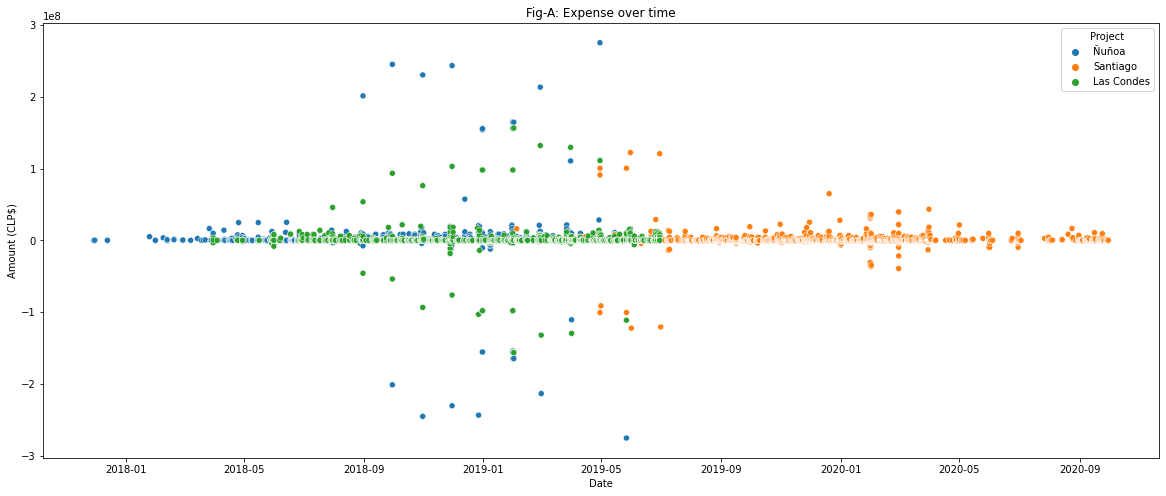

In [8]:
fig, axs = plt.subplots(figsize=(20,8))
fig_A=sns.scatterplot(data=df, x='Date', y='Amount', hue='Project')
fig_A.set(ylabel='Amount (CLP$)', title='Fig-A: Expense over time')

\
At a first glance we observe numerous outliers in the 'Amount' variable, which presents a somewhat symmetric distribution around the axis 'Amount=0'. Although it makes sense to have negative expenses (generally  invoice reversals and expense cancelations are represented as negative figures), it is extremely odd to see negative amounts of such magnitude. Therefore, it should be investigated what these amounts represent to determine if they should belong or not to our dataset.

In [9]:
df.loc[abs(df.Amount)>1e8]

,Date,Project,Account,Detail,Amount
2692,2018-08-31,Ñuñoa,Cosos Operacionales Provisionados,AGO.18 PROVISION DE COSTOS,201267386
3423,2018-09-30,Ñuñoa,Cosos Operacionales Provisionados,AGO.18 PROVISION DE COSTOS(Anulación) - 1044927,-201267386
3424,2018-09-30,Ñuñoa,Cosos Operacionales Provisionados,2018.09 PROVISION DE COSTOS,245220145
4469,2018-10-31,Ñuñoa,Cosos Operacionales Provisionados,2018.09 RES.PROV. DE COSTOS(Anulación)-1061601,-245220145
4470,2018-10-31,Ñuñoa,Cosos Operacionales Provisionados,OCT.10 PROVISION DE COSTOS,230441622
5475,2018-11-30,Ñuñoa,Cosos Operacionales Provisionados,OCT.10 REVEPROVISION DE COSTOS(Anulación) - 10...,-230441622
5476,2018-11-30,Ñuñoa,Cosos Operacionales Provisionados,NOV.18 PROVISION DE COSTOS,243498183
6379,2018-12-27,Ñuñoa,Cosos Operacionales Provisionados,NOV.18 REV.PROVISION DE COSTOS(Anulación) - 11...,-243498183
6620,2018-12-31,Ñuñoa,Cosos Operacionales Provisionados,2018.12 PROVISION DE COSTOS,155555340
6621,2018-12-31,Ñuñoa,Cosos Operacionales Provisionados,2018.12 PROVISION DE COSTOS(Anulación) - 11426...,155555340


Studying this table, it is observed that even though these amounts have different projects and accounts associated, they all have in common the 'Detail' variable: 'PROVISION DE COSTOS' (provision of costs).
It is also interesting to notice that all these amounts seem to have a positive and a negative figure, apparently canceling each other and resulting a total sum of zero.

This discovery was brought to the accountant of the company for clarification, and he explained that he employs this mechanism to balance his books. The reasons behind this are not relevant for this analysis, but it is clear that this data do not represent real expenses and that it is safe to take them out of the dataset, as their presence might induce an erroneous interpretation and serves no purpose in this analysis.

[Text(0, 0.5, 'Amount (CLP$)'), Text(0.5, 1.0, 'Fig-B: Expense over time')]

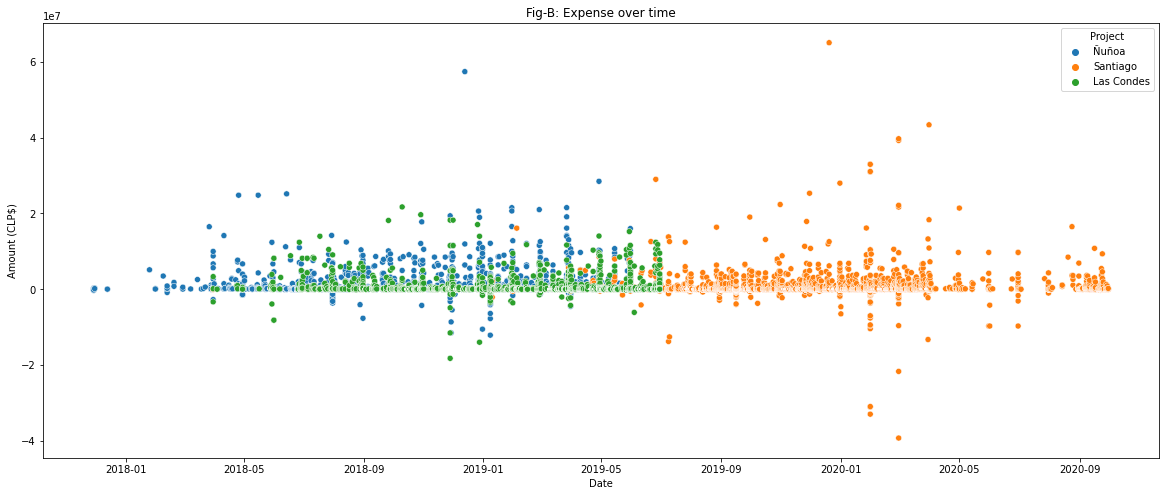

In [10]:
str_to_drop=['PROVISION DE COSTOS', 'Provision Costos', 'PROV. DE COSTOS']
df=df[~df.Detail.str.contains('|'.join(str_to_drop), na=False)]

fig, axs = plt.subplots(figsize=(20,8))
fig_B=sns.scatterplot(data=df, x='Date', y='Amount', hue='Project')
fig_B.set(ylabel='Amount (CLP$)', title='Fig-B: Expense over time')

\
After deleting the aforementioned rows from the dataframe, it can better observed the distribution of the expenses throughout time. Taking a closer look at the remaining negative values of the variable 'Amount' reveals that most of them respond to cancelation of invoices and salaries due to errors of different nature. These observations will not be deleted, as they represent the true nature of the economic development of each project, and it might represent valuable information for future analysis.

In [11]:
df.loc[df.Amount<-1e7]

,Date,Project,Account,Detail,Amount
5343,2018-11-29,Ñuñoa,Subcontratos,Factura de proveedores - Cancelación - P76616334,-11505999
6604,2018-12-31,Ñuñoa,Materias Primas de Obras en Ejecució n,Factura de proveedores - Cancelación - P96777600,-10528554
6836,2019-01-08,Ñuñoa,Remuneraciones Operacionales,Sueldo Base(Anulación) - 1111550,-12113998
15819,2019-07-09,Santiago,Subcontratos,Factura de proveedores - Cancelación - P76575848,-13781856
15843,2019-07-10,Santiago,Subcontratos,Factura de proveedores - Cancelación - P77387860,-12570181
20756,2020-01-31,Santiago,Remuneraciones Operacionales,CENTRALIZACION REMUNERACION ENERO 2020(Anulación),-32951118
20757,2020-01-31,Santiago,Remuneraciones Operacionales,Sueldo Base(Anulación) - 1413606,-31053018
20758,2020-01-31,Santiago,Remuneraciones Operacionales,Sueldo Base(Anulación) - 1406376,-30943351
20759,2020-01-31,Santiago,Remuneraciones Operacionales,CENTRALIZACION REMUNERACION ENERO 2020(Anulación),-10400546
21755,2020-02-29,Santiago,Remuneraciones Operacionales,Sueldo Base(Anulación) - 1432324,-39247644


\
Finally, the values for all five variables are overviewed, looking for signs of empty/invalid entries, spelling errors, and range errors. As mentioned before, all variables but 'Detail' have 29106 valid values. 

Furthermore, analizing Fig-B some conclusions can be drawn:

* The variable 'Project' can take three values: 'Las Condes', 'Santiago' and 'Ñuñoa'. This characteristic is expected and indicates that this variable does not need modifications.
* The variable 'Date' goes from the end of year 2017 until the end of year 2020. All values look within range and no problem is observed
* The variable 'Detail' is very difficult to analize, because its values are associated to specific providors, reference numbers, purchase order, invoice, etc. For this analysis report this variable will not be utilized, but it will be kept within the dataframe as reference.
* The variable 'Amount' was already analyzed, all its values are valid and fall within range.

Considering this, only the variable 'Account' remains to be studied. Aditionally, the 21 null values of the variable 'Detail' should be studied, to determine a reason for this situation and possible consequences.


In [12]:
sorted(df.Account.unique())  # Shows all the unique values that the variable 'Account' takes

['Ajuste por Redondeo',
 'Asesorías y Honorarios',
 'Caja Chica Obra',
 'Caja Chica Oficina',
 'Comisión Banco',
 'Costo De Distribucion',
 'Diferencia de Precio',
 'Diferencias Tipos de Cambio',
 'Gastos Comunes',
 'Gastos Generales',
 'Gastos por Arriendos Operacionales',
 'Gastos por Herramientas Menores',
 'Indemnización por Daños y Perjuicios',
 'Insumos Administración',
 'Mantención Activo Fijo',
 'Materias Primas de Obras en Ejecució n',
 'Materias Primas de Obras en Ejecución',
 'Multas Municipales',
 'Permisos Municipales',
 'Recreación y Bienestar',
 'Remuneraciones Contingencia',
 'Remuneraciones Operacionales',
 'Seguros y Similares',
 'Servicios Básicos',
 'Subcontratos',
 'Telecomunicaciones y Alarmas']

These are all the values the variable 'Account' takes. Although some grouping and generalization could be done to reduce the number of accounts and make it more manageable, it will not be done to not alter the conclusions of the analysis. Only a spelling error will be corrected for now, and later some translations will be made for plotting purposes.

In [13]:
df['Account']=df['Account'].str.replace('Ejecució n','Ejecución', regex=False)

\
Next, the missing entries on the variable 'Detail' will be shown to determine what to do with them:

In [14]:
df.loc[df.Detail.isnull()]

,Date,Project,Account,Detail,Amount
1150,2018-07-11,Ñuñoa,Materias Primas de Obras en Ejecución,NaN,97800
13415,2019-05-15,Ñuñoa,Materias Primas de Obras en Ejecución,NaN,97800
18390,2019-10-31,Santiago,Remuneraciones Operacionales,NaN,-1098232
18391,2019-10-31,Santiago,Remuneraciones Operacionales,NaN,10000
18398,2019-10-31,Santiago,Remuneraciones Operacionales,NaN,552470
18401,2019-10-31,Santiago,Remuneraciones Operacionales,NaN,690576
18405,2019-10-31,Santiago,Remuneraciones Operacionales,NaN,1834350
18408,2019-10-31,Santiago,Remuneraciones Operacionales,NaN,2505892
18409,2019-10-31,Santiago,Remuneraciones Operacionales,NaN,4078739
18410,2019-10-31,Santiago,Remuneraciones Operacionales,NaN,4720928


After careful examination, it is decided that the missing data does not represents a problem, since later on the data will not be grouped by 'Detail', but by 'Account'. The missing information in 'Detail' responds to empty fields left during the registration of the expense, and not a database problem that might affect the analysis.

**Finally, the data is saved as a csv file called 'Tidy Data' and will be available as reference for future analyses.** 

In [15]:
df.to_csv('Tidy_Data.csv', encoding='cp1252', index=False)

---
### **Exploring the data** ###

Now that the data is formatted and clean, it can be studied in further detail. To elaborate the neccesary graphs, different dataframes will be created by pivoting, slicing and reshaping the original dataframe (df).

When studying the development of a construction project overt time, it is good practice to graph the 'Cumulative Expenses' instead of the individual expenses represented by 'Amount'. Therefore the dataframe df_1 is created by pivoting the original dataframe.

In [16]:
df_0= pd.pivot_table(df, values='Amount', columns='Project', index='Date', aggfunc=np.sum)
df_0.head()

Project,Las Condes,Santiago,Ñuñoa
Date,,,
2017-11-29,NaN,NaN,0.0
2017-11-30,NaN,NaN,465476.0
2017-12-13,NaN,NaN,35283.0
2018-01-25,NaN,NaN,5121402.0
2018-01-31,NaN,NaN,298235.0


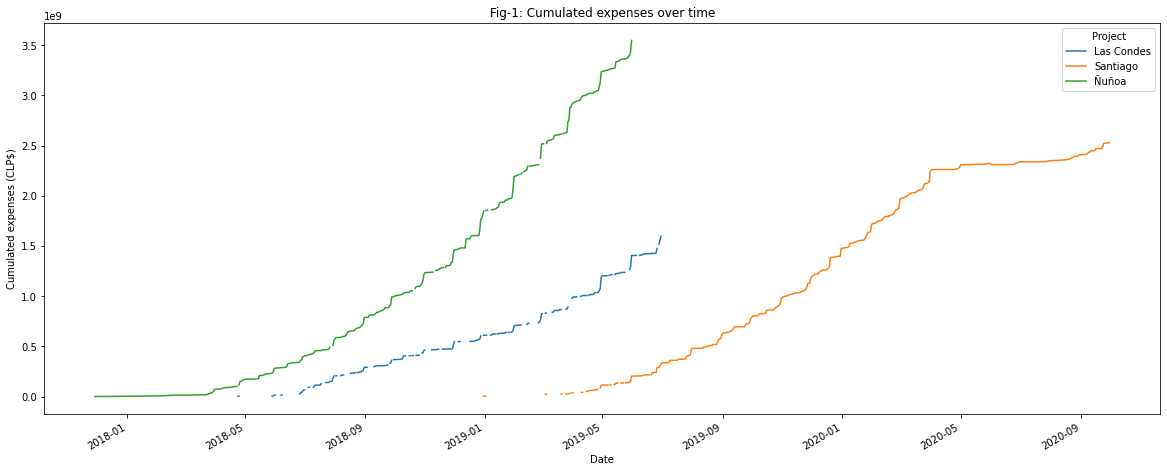

In [17]:
fig_1= df_0.cumsum().plot(kind='line', ylabel='Cumulated expenses (CLP$)', title='Fig-1: Cumulated expenses over time', figsize=(20,8))
plt.savefig('Figures\Fig-1_Cumulated expenses over time.jpg')

As shown in Fig-1, these three projects were developed at different times and therefore is difficult to compare them to each other. Also it is observed that it is not easy to determine the actual starting date for each project, because there is some expenses on the beggining of each project, followed by long periods of inactivity. These expenses respond to costs associated to the preparation stages of each project, and not the project itself. A criteria must be established to mark the beggining of each project.

Inspecting Fig-1, it is noteworthy to observe that the flattening at the end of the 'Santigo' curve is due to the Covid-19 outbreak. The project was paused during this time, and obviously will not be considered for this analysis. 

For the purposes of this analysis, some assumptions will be made:
1. As mentioned before, it will only be considered the data for the first year of each project.
2. If on a given date there is no entries for a project, then the amount spent that day is equal to zero (NaN=0)
3. The starting date of a project will be established as the day when the cumulated expense of a project is greater than $5.000.000 (a little over 5000 USD).

Considering this, a new dataframe (df_1Y) will be created and used throughout this analysis. This new dataframe will have the same shape and characteristics than the original dataframe 'df', with the only difference being that 'df_1Y' will contain the data of only the first year of each project.

In [18]:
data_1Y=[]                                                                            # In this list will be stored the filtered dataframes which will be concatenated at the end
project_names=['Las Condes', 'Santiago', 'Ñuñoa']

for project in project_names:
   
    start= df.loc[(df.Project==project) & (df.loc[df.Project==project, 'Amount'].cumsum()>5e7)].Date.iloc[0]          # Start date for a single project
    end= start + pd.Timedelta(days=365)                                                                               # End date for a single project (start date + 365 days)
    data_1Y.append(df.loc[(df.Project==project) & (df.Date>=start) & (df.Date<end)])                                  # Appends filtered dataframe to the list 

df_1Y=pd.concat(data_1Y , ignore_index=True)

The new dataframe 'df_1Y' is ready to be used. A new plot of 'Cumulated expenses vs time' will be plotted from the new dataframe, and assuming that all three projects started on the same date (to make visualitazion and comparison easier)

In [19]:
df_1=pd.pivot_table(df_1Y, values='Amount', columns='Project', index='Date', aggfunc=np.sum)
df_1=df_1.asfreq('D')                                                 # This line is to change the frequency of the index, adding rows with the missing days in between entries.


for project in project_names:
    diff=df_1[project].dropna().index[0]-df_1.index[0]                # Determines the time difference between the first entry of the dataframe (index[0]) and the first valid (not NaN) entry of each project
    df_1[project]=df_1[project].shift(periods=diff.days*-1, freq='D') # Uses the aforementioned difference to shift the data

df_1=df_1[:365]    
df_1.fillna(0, inplace=True) 

In [20]:
df_1['N° of days']=range(1, len(df_1.index)+1)  # Adds a new column enumerating days and sets it as index
df_1.set_index('N° of days', inplace=True)
df_1.head()

Project,Las Condes,Santiago,Ñuñoa
N° of days,,,
1,12189894.0,8039388.0,32037741.0
2,12654049.0,689492.0,2840000.0
3,3385719.0,6283579.0,0.0
4,0.0,1404995.0,0.0
5,0.0,0.0,62016.0


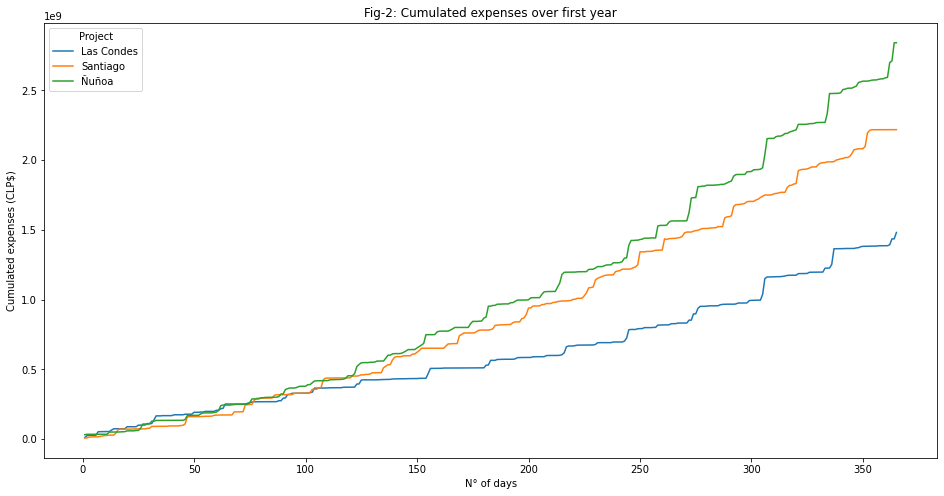

In [21]:
fig_2= df_1.cumsum().plot(kind='line', ylabel='Cumulated expenses (CLP$)', title='Fig-2: Cumulated expenses over first year', figsize=(16,8))
plt.savefig('Figures\Fig-2_Cumulated expenses over first year.jpg')

As shown on Fig-2, there is a clear difference in the development rythm of expenses between the project 'Las Condes' and the other two projects. More exploration is required to explain this situation. 

To further explore the data, a new dataframe df_2 will be created rearranging the data of df_1Y.

In [22]:
df_2=pd.pivot_table(df_1Y, columns=['Project', 'Account'], values='Amount', aggfunc=np.sum).melt()
df_2.head()

,Project,Account,value
0,Las Condes,Diferencia de Precio,-5144
1,Las Condes,Diferencias Tipos de Cambio,7547
2,Las Condes,Gastos Generales,35000
3,Las Condes,Gastos por Arriendos Operacionales,108745565
4,Las Condes,Gastos por Herramientas Menores,4202529


Fig-3 will be plotted to compare the total sum of the accounts for each project. Since there is more than 20 different accounts, only the accounts with a total expense per project of over 10.00.0000 CLP (a little over 10.000 USD). For the purposes of the following plots, the name of the accounts over $10.000.000 will be translated.

In [23]:
df_2.loc[df_2.value > 1e7].Account.unique()

array(['Gastos por Arriendos Operacionales',
       'Materias Primas de Obras en Ejecución',
       'Remuneraciones Operacionales', 'Seguros y Similares',
       'Subcontratos', 'Gastos por Herramientas Menores'], dtype=object)

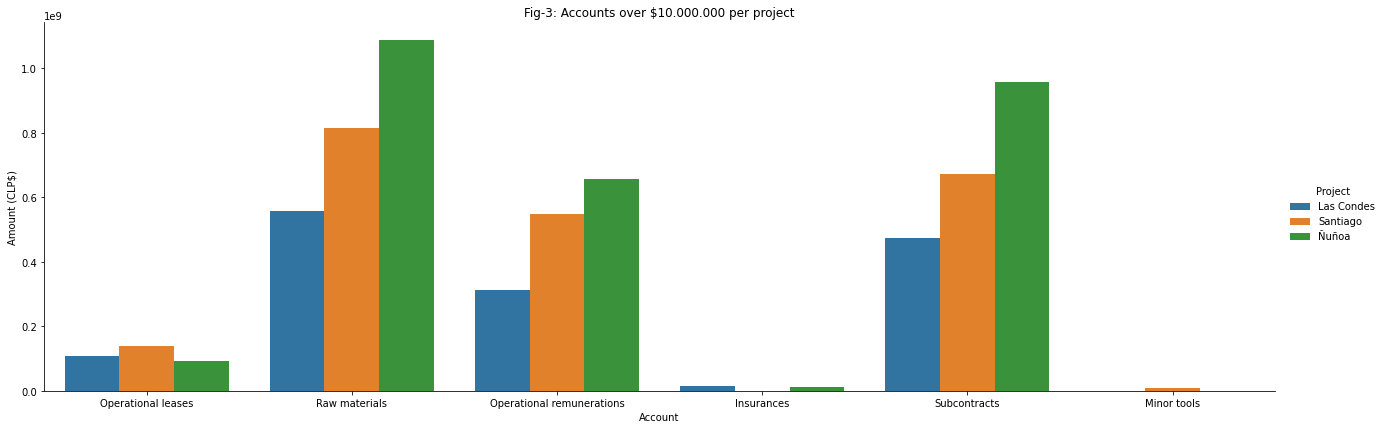

In [24]:
replace_dict={'Gastos por Arriendos Operacionales': 'Operational leases', 'Gastos por Herramientas Menores': 'Minor tools', 'Materias Primas de Obras en Ejecución': 'Raw materials', 'Remuneraciones Operacionales': 'Operational remunerations', 'Seguros y Similares': 'Insurances', 'Subcontratos': 'Subcontracts'}
df_2=df_2.replace({'Account': replace_dict})   # Translation of main values of variable 'Account'

fig_3=sns.catplot(data=df_2.loc[df_2.value>1e7], x='Account' , y='value', hue='Project', kind='bar', height=6, aspect=3)
fig_3.set(ylabel='Amount (CLP$)', title='Fig-3: Accounts over $10.000.000 per project')
plt.savefig('Figures\Fig-3_Accounts over $10.000.000 per project.jpg')

As expected, the project 'Las Condes' spent less than the other two projects in all main accounts but 'Operational leases'

Next, to compare the value of each account with respect to the total spent on each project, the plot will be redrawn by comparing the **percentages of total spent** for each account. For plotting purposes, only accounts with a percentage of over 0,5% will be shown in the plot

In [25]:
df_2['Cost percentage']=0

for project in project_names:
    Total=df_2.loc[df_2.Project==project, 'value'].sum()                                                          # 'Total' is the sum of the values for each project
    df_2.loc[df_2.Project==project , 'Cost percentage']= (df_2.loc[df_2.Project==project , 'value'] / Total)*100  # 'Cost percentage is assigned the 'value' of each account divided in the 'Total'
    
df_2.head()

,Project,Account,value,Cost percentage
0,Las Condes,Diferencia de Precio,-5144,-0.000347
1,Las Condes,Diferencias Tipos de Cambio,7547,0.000509
2,Las Condes,Gastos Generales,35000,0.002362
3,Las Condes,Operational leases,108745565,7.340230
4,Las Condes,Minor tools,4202529,0.283667


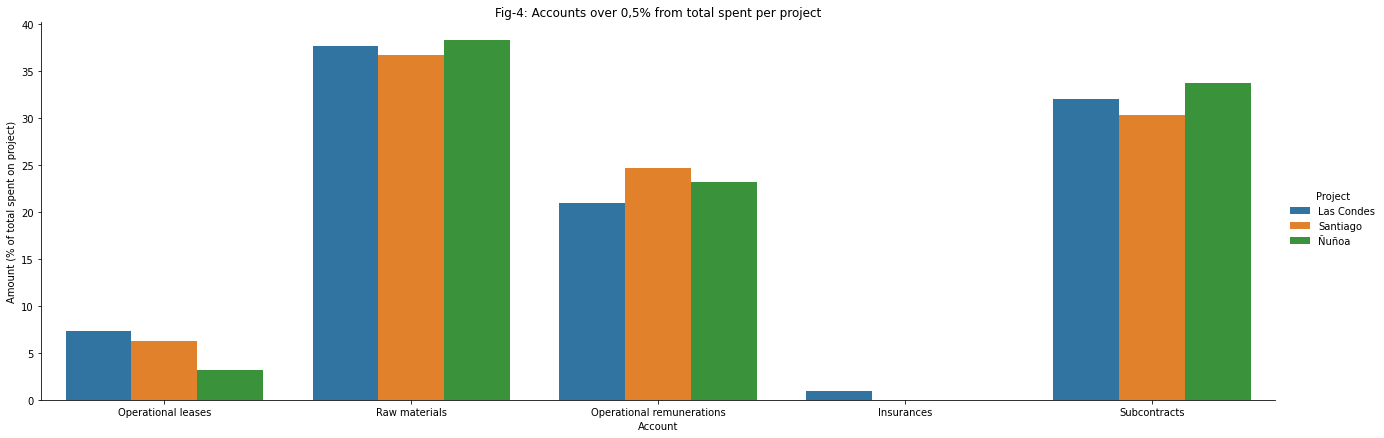

In [26]:
fig_4=sns.catplot(data=df_2.loc[df_2['Cost percentage']>0.5], x='Account' , y='Cost percentage', hue='Project', kind='bar', height=6, aspect=3)
fig_4.set(ylabel='Amount (% of total spent on project)', title='Fig-4: Accounts over 0,5% from total spent per project')
plt.savefig('Figures\Fig-4_Accounts over 0,5% from total spent per project.jpg')

Analyzing Fig-4, it shows that all three projects destinated similar percentages of their budget to each account. On the other hand, Fig-3 shows that project 'Las Condes' spent significantly less than the other two projects. This suggests that the low amount of spending during the first year of project 'Las Condes' cannot be explained by the allocation of resources on each account, but rather on the slow rhythm of spending of said project.

To corroborate this, a new plot will be made with the amount of entries per project during the first year.

In [27]:
df_3=df_1Y.copy()
df_3['N° of purchases']=1
df_3=pd.pivot_table(df_3, values='N° of purchases', columns='Project', index='Date', aggfunc=np.sum)

df_3=df_3.asfreq('D')                                                 # This line is to change the frequency of the index, adding rows with the missing days in between entries.

for project in project_names:
    diff=df_3[project].dropna().index[0]-df_3.index[0]                # Determines the time difference between the first entry of the dataframe (index[0]) and the first valid (not NaN) entry of each project
    df_3[project]=df_3[project].shift(periods=diff.days*-1, freq='D') # Uses the aforementioned difference to shift the data

df_3=df_3[:365]    
df_3.fillna(0, inplace=True) 

df_3['N° of days']=range(1, len(df_1.index)+1)                        # Adds a new column enumerating days and sets it as index
df_3.set_index('N° of days', inplace=True)

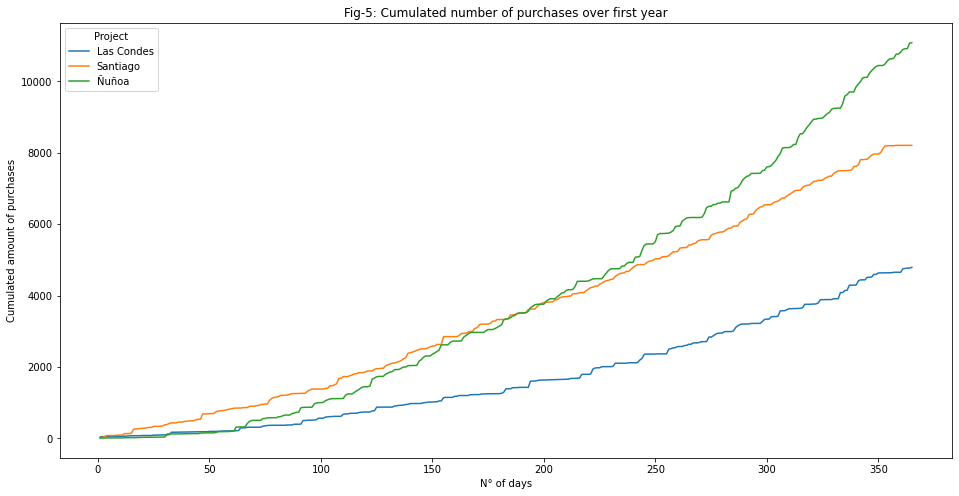

In [28]:
df_3.cumsum().plot(kind='line', ylabel='Cumulated amount of purchases', title='Fig-5: Cumulated number of purchases over first year', figsize=(16,8))
plt.savefig('Figures\Fig-5_Cumulated number of purchases over first year.jpg')

As expected, project 'Las Condes' has a slower rhythm of purchases made than the other two projects.

---
### **Conclusions** ###
After the analysis performed, the following insights can be drawn:

* No sign of irregular patterns of spending was found for any of the projects 
* The three projects under study spent similar percentages of their total spent on each account 
* The lower spending in the project 'Las Condes' cannot be explained by a lack of spending on certain accounts or items
* Project 'Las Condes' had a much slower rhythm of spending than the other two projects


